<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db;"><u>Analyse exploratoire des données</u></h1> <br> 

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Dans cette section, nous nous penchons sur la visualisation et l'analyse descriptive du jeu de données "data", obtenu après le nettoyage des bases de données initiales du fichier "Preparation_donnees.ipynb". Ainsi des applications ont été créées pour permettre à l'utilisateur d'avoir une large gamme de choix en ce qui concerne la visualisation des données.</p>




In [2]:
# Import des packages
from importlib import reload
import Declarations as d
reload(d)

<module 'Declarations' from '/home/onyxia/work/Projet_Python/src/Declarations.py'>

In [3]:
# Importation du jeu de données
data = d.pd.read_csv("./bases/data.csv")

In [4]:
# Visualisation 
data.head()

,Country,Country_Code,Year,PIB_par_travailleur,Capital_par_travailleur,Population_travailleur
0,Albania,ALB,2023,8130.753594,2008.989312,1830356
1,Albania,ALB,2022,7693.634432,1955.422229,1861085
2,Albania,ALB,2021,7211.368890,1890.602681,1894123
3,Albania,ALB,2020,6523.372724,1558.771159,1921536
4,Albania,ALB,2019,6679.059681,1556.807023,1941067


<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">I- Présentation des données</h1>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">L'objectif ici est de présenter brièvement les données 'data' obtenues suite à la préparation et de télécharger également la carte du monde afin de permettre de meilleures visualisations.</p>




In [5]:
# Dimensions
data.shape

(3978, 6)

In [6]:
# Informations sur la DF
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3978 entries, 0 to 3977
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  3978 non-null   object 
 1   Country_Code             3978 non-null   object 
 2   Year                     3978 non-null   int64  
 3   PIB_par_travailleur      3978 non-null   float64
 4   Capital_par_travailleur  3978 non-null   float64
 5   Population_travailleur   3978 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 186.6+ KB


In [7]:
# Générer des statistiques descriptives récapitulatives
data.describe()

,Year,PIB_par_travailleur,Capital_par_travailleur,Population_travailleur
count,3978.000000,3978.000000,3978.000000,3.978000e+03
mean,2006.500000,22153.828257,4838.793743,2.447700e+07
std,9.811942,28195.604973,6349.347076,7.459113e+07
min,1990.000000,394.964216,-17.249099,4.215900e+04
25%,1998.000000,3396.523462,729.406423,2.340246e+06
50%,2006.500000,9119.576579,1925.920685,6.333687e+06
75%,2015.000000,31001.155969,6582.604593,2.096231e+07
max,2023.000000,166018.899443,59938.616023,9.781907e+08


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">La moyenne du PIB par travailleu pour l'ensemble des pays considérés sur la période 1990-2023 est de 22153.8 Dollars américains (valeurs de 2015). Leur population en âge de travailer moyenne sur cette période est de 2.45e+07 habitants.</p>

In [8]:
# Importation du shapefile pour la carte du monde

## Étape 1: Télécharger le fichier ZIP depuis Natural Earth
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
zip_file_path = "./bases/ne_110m_admin_0_countries.zip"

response = d.requests.get(url)
with open(zip_file_path, "wb") as file:
    file.write(response.content)
print("Téléchargement terminé.")

## Étape 2: Extraire le fichier ZIP
extract_dir = "bases"
if not d.os.path.exists(extract_dir):
    d.os.makedirs(extract_dir)

with d.zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)
print("Extraction terminée.")

## Étape 3: Charger les données avec GeoPandas
shapefile_path = d.os.path.join(extract_dir, "ne_110m_admin_0_countries.shp")
world = d.gpd.read_file(shapefile_path)

## Transformer les coordonnées géographiques en coordonnées projetées
world.to_crs('EPSG:4326') 

Téléchargement terminé.
Extraction terminée.


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [9]:
# Renommer des colonnes spécifiques
world = world.rename(columns={"CONTINENT": "Continent", "ISO_A3": "Country_Code"})

# Sélectionner certaines colonnes
my_columns = ['geometry','Country_Code', 'Continent']
world = world[my_columns]


In [10]:
# Visualiser la base
world.head()

,geometry,Country_Code,Continent
0,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",FJI,Oceania
1,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",TZA,Africa
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH,Africa
3,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",CAN,North America
4,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",USA,North America


In [11]:
# Fusionner les données de départ
world_df = d.pd.merge(world, data, how='inner', on=['Country_Code'])

In [12]:
# Visualisation
print(f"La base contient world_df {world_df.shape[0]} lignes et {world_df.shape[1]} colonnes.")
world_df.head()

La base contient world_df 3672 lignes et 8 colonnes.


,geometry,Country_Code,Continent,Country,Year,PIB_par_travailleur,Capital_par_travailleur,Population_travailleur
0,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",TZA,Africa,Tanzania,2023,1953.121160,835.615503,36128663
1,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",TZA,Africa,Tanzania,2022,1920.150313,816.413879,34975915
2,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",TZA,Africa,Tanzania,2021,1898.646426,770.287759,33827484
3,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",TZA,Africa,Tanzania,2020,1883.525946,739.405285,32686532
4,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",TZA,Africa,Tanzania,2019,1910.042707,746.891070,31603226


In [13]:
world_df.shape

(3672, 8)

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">II- Visualisations </h1>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Ici nous voulons présenter la base en utilisant geopandas afin d'offrir différentes options de visualisation.</p>


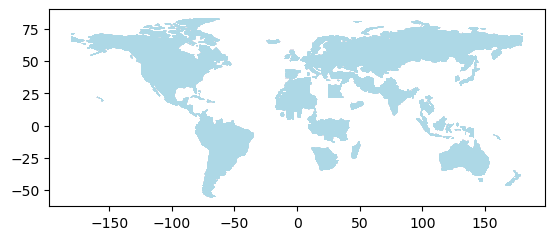

In [14]:
# Plot
world_df.plot(color='lightblue')
d.plt.show()

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">II.1- <u>Visualisation des différentes indicateurs pour tous les pays</u></h2>
<br/>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Nous créons ici une application qui permet de voir sur la carte du monde les différents indicateurs. <li 


In [15]:
# Initialisation de l'application Dash
app1 = d.dash.Dash(__name__)

# Structure du layout
app1.layout = d.html.Div([
    # Sélecteur pour l'année
    d.dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in sorted(world_df['Year'].unique())],
        value=world_df['Year'].min(),  # Valeur par défaut pour l'année
        multi=False,
    ),
    # Sélecteur pour les variables
    d.dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'PIB par travailleur', 'value': 'PIB_par_travailleur'},
            {'label': 'Capital par travailleur', 'value': 'Capital_par_travailleur'},
            {'label': 'Population des travailleurs', 'value': 'Population_travailleur'}
        ],
        value='PIB_par_travailleur',  # Valeur par défaut pour la variable sélectionnée
        multi=False,
    ),
    # Graphique choropleth
    d.dcc.Graph(id='choropleth-map'),
])

# Callback pour la mise à jour de la carte en fonction des sélections
@app1.callback(
    d.Output('choropleth-map', 'figure'),
    [d.Input('year-dropdown', 'value'),
     d.Input('variable-dropdown', 'value')]
)
def update_map(selected_year, selected_variable):
    subset_gdf = world_df[world_df['Year'] == selected_year]
    subset_gdf.index = subset_gdf['Country']
    
    # Création de la figure choropleth
    fig = d.px.choropleth(
        subset_gdf,
        geojson=subset_gdf.geometry,
        locations=subset_gdf.index,
        color=selected_variable,
        projection="natural earth",
        title=f'{selected_variable} in {selected_year}',
        color_continuous_scale='Reds'  # Palette de couleurs continue
    )
    
    # Mise à jour des propriétés géographiques et des marges
    fig.update_geos(fitbounds="locations", visible=True)
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    
    return fig

# Lancement de l'application
if __name__ == '__main__':
    app1.run_server(debug=True, port=8051)


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Les parties de la carte qui sont de couleur bleue représentent les pays dont les données ne sont pas présentes dans notre base. Les couleurs rouges vont de la moins foncée pour les petites valeurs de l'indicateur à la plus foncée à la plus foncée pour les plus grandes valeurs de l'indicateur. Par exemple en 2023, pour ce qui est du PIB par travailleur, l'Australie, les pays d'Amérique du Nord (USA, Canada) et les pays d'Europe comme la Suède, le Royaume Uni enregistrent les plus grandes valeurs contrairement aux pays d'Afrique et d'Amérique qui enregistrent des valeurs relativement plus faibles.  <li 


<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">II.2- <u>Evolution des indicateurs de 1990 à 2023 pour chaque continent</u></h2>
<br/>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">La deuxième application afficher les plots des séries temporelles des différents indicateurs pour différents pays.</p>




In [16]:
# Créer un Dash app
app2 = d.dash.Dash(__name__)

# Créer le graphique initial
fig = d.px.line(world_df, x='Year', y=["PIB_par_travailleur"], color='Country')

# Créer la mise en page de votre application Dash
app2.layout = d.html.Div([
    # Sélecteur de continents
    d.dcc.Dropdown(
        id='continent-selector',
        options=[
            {'label': continent, 'value': continent}
            for continent in world_df['Continent'].unique()
        ],
        multi=True,
        value=world_df['Continent'].unique()  # Sélectionner tous les continents par défaut
    ),
    # Sélecteur de variables
    d.dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'PIB par travailleur', 'value': 'PIB_par_travailleur'},
            {'label': 'Capital par travailleur', 'value': 'Capital_par_travailleur'},
            {'label': 'Population des travailleurs', 'value': 'Population_travailleur'}
          
        ],
        value='PIB_par_travailleur',  # Valeur par defaut de la variable representée
        multi=False,
    ),
    
    # Graphique
    d.dcc.Graph(
        id='line-chart',
        figure=fig
    )
])

# Définir la logique de la mise à jour du graphique en fonction de la sélection du sélecteur
@app2.callback(
    d.Output('line-chart', 'figure'),
    [d.Input('variable-dropdown', 'value'),
     d.Input('continent-selector', 'value')]
)
def update_graph2(selected_variable, selected_continents):
    filtered_df = world_df[world_df['Continent'].isin(selected_continents)]
    fig = d.px.line(filtered_df, x='Year', y=selected_variable, color='Country',
                   labels={'Year': 'Année', selected_variable : f"{selected_variable}"})
    
    
    return fig


# Exécuter l'application Dash
if __name__ == '__main__':
    app2.run_server(debug=True, port=8052)

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">En double-cliquant sur un pays en particulier, on peut obtenir sa série uniquement. De façon globale, le PIB par travailleur et la population en age de travailler de tous les pays ont crû sur la période considérée. Le capital par travailleur (cela représente aussi l'investissement par travailleur) connait en revanche beaucoup plus de fluctuation. Pour la majorité des pays considérés, le PIB par travailleur a connu une baisse en 2020 notamment à cause de la crise de la covid-19. En termes de population en âge de travailler l'Inde surclasse tous les autres pays et enregistre pour ce indicateur une croissance énorme.</p>

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">III- <u>Analyse descriptive</u></h1>
<br/>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Rappelons notre objectif qui est de vérifier empiriquement les résultats du modèle de Solow. Nous allons analyser pour chaque indicateur la série brute sur la période considérée et la série lissée par une moyenne mobile d'ordre 6. En effet Les cycles économiques à long terme (comme les récessions ou expansions) sont souvent de l'ordre de 5 à 10 ans. Un lissage sur 6 ans nous permettra d'observer ces tendances sans trop supprimer les informations utiles. De plus cet ordre permet de minimiser l'impact des variations annuelles ou des événements exceptionnels (comme une crise économique ponctuelle). <br>
Pour ce qui est de l'analysee des séries temporelles, nous utilisons la fonction 'analyse_serie_temporelle' du fichier 'Declarations' qui prend en arguments le jeu de données, l'indicateur (PIB par tete, Capital par tête, ...) et le pays à considérer puis renvoie le graphe:
</p>

<ul>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">de la série temporelle brute,</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">de la série temporelle lissée par une moyenne mobile d'ordre 6,</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">de la décomposition de la série temporelle en composante saisonnière, composante tendancielle et rédisuelle.</li>
</ul>


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Enfin, elle permet de tester la stationnarité de la série (Augmented Dickey-Fuller test).</p> <br>

<h3 style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; "><u><strong>APARTE</strong></u></h3>


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; "><b>Hypothèses du Test de Dickey-Fuller Augmenté (ADF)</b></p>

<div style="margin-left: 20px;">

- <p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; "><b><em>H_0: </em></b>La série temporelle a une racine unitaire, ce qui indique la non-stationnarité.</p>


- <p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; "><b><em>H_1: </em></b>La série temporelle n'a pas de racine unitaire, ce qui indique la stationnarité.</p> 
    </div>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; "><b>Interprétation des résultats :</b></p>

<div style="margin-left: 20px;">

<ul>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Si la statistique du test est inférieure à la valeur critique au seuil de signification (par exemple, 0.05), on rejette l'hypothèse nulle et conclut que la série temporelle est stationnaire.</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Sinon, on ne peut pas rejeter l'hypothèse nulle, cela suggère que la série temporelle est non stationnaire.</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Le test est implémenté par la bibliothèque Statsmodels de Python.</li>
</ul>



<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">III.1- <u>Démonstration</u></h2>
<br/>

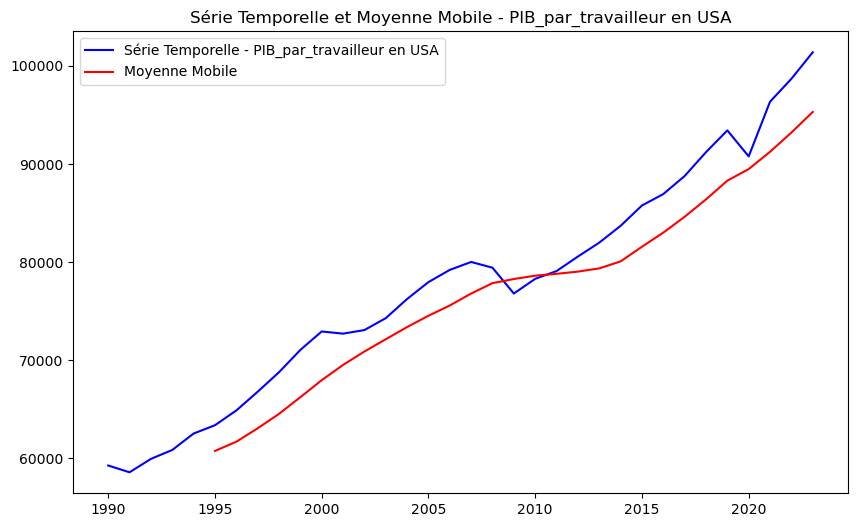

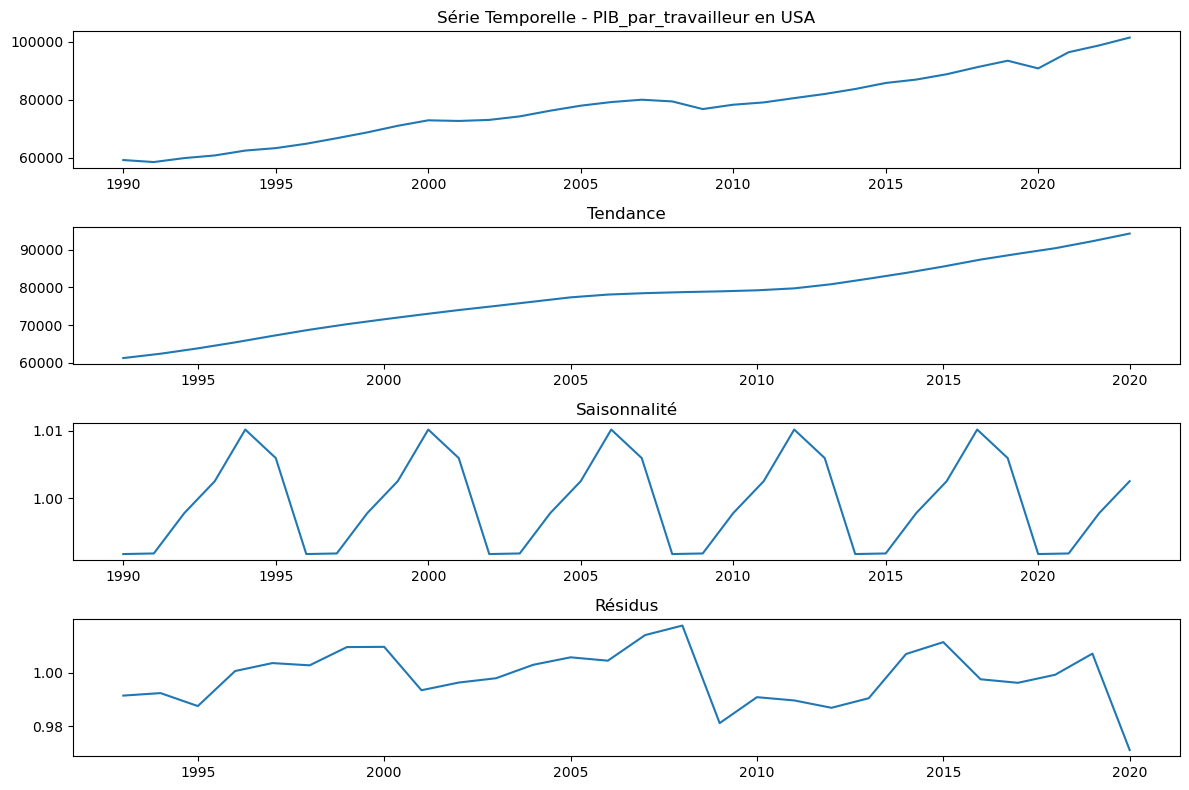

Test de Dickey-Fuller Augmenté:
Statistique de test = 0.9325312906903209
Valeur critique (5%) = -2.954126991123355


In [17]:
d.analyse_serie_temporelle(data,'PIB_par_travailleur', 'USA')

<ul>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">La courbe en bleu montre l'évolution du PIB par travailleur aux États-Unis entre 1990 et 2023. On observe une croissance globale, avec des fluctuations mineures à certains moments comme en 2009 et en 2020.</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">La courbe en rouge représente la version lissée des données grâce à la moyenne mobile d'ordre 6. Cette tendance montre une progression régulière du PIB par travailleur sur l'ensemble de la période.</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Les oscillations saisonnières sont très faibles et presque négligeables (entre 1.004 et 0.998). Cela indique que l'effet saisonnier est minime dans cette série.</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Les résidus représentent les variations non expliquées par la tendance ou la saisonnalité. Ici, ils oscillent autour de 1, sans schéma évident, suggérant un comportement aléatoire.</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">La statistique de test (0,93) est supérieure à la valeur critique au niveau de 5 % (-2,95). Cela indique que l'on ne peut pas rejeter l'hypothèse nulle. La série n'est pas stationnaire.</li>
</ul>

   


<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 23px; color: #3498db;">III.2- <u>Application</u></h1>
<br/>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 18px; ">Nouus créons ici une application qui fait de manière automatique pour chaque pays tout ce qui a été fait dans la partie précédente.
</p>

In [18]:
# Créer une bibliothèque pour les codes pays et les pays
pays_disponibles = dict(zip(data['Country_Code'], data['Country']))
print(len(pays_disponibles))

117


In [19]:
presence_negatif = (data['Capital_par_travailleur'] < 0).any()
print(presence_negatif)

True


In [20]:
# Créer un Dash app
app = d.dash.Dash(__name__)

# Créer un dictionnaire avec 'Country_Code' comme clé et 'Country' comme valeur
pays_disponibles = dict(zip(data['Country_Code'], data['Country']))

app.layout = d.html.Div([
    d.html.H1("Analyse de Série Temporelle"),
    
    
   # Sélecteur de variables
    d.dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'PIB par travailleur', 'value': 'PIB_par_travailleur'},
            {'label': 'Capital par travailleur', 'value': 'Capital_par_travailleur'},
            {'label': 'Population des travailleurs', 'value': 'Population_travailleur'}
          
        ],
        value='PIB_par_travailleur',  # valeur par defaut de la variable representée
        multi=False,
    ),
    
    
    # Sélection du pays
    d.html.Label("Choisissez le pays :"),
    d.dcc.Dropdown(
        id='dropdown-pays',
        options = [
            {'label': pays_disponibles[pays], 'value': pays} for pays in pays_disponibles
        ],

        value=next(iter(pays_disponibles))  # Cela prendra la première clé du dictionnaire
    ),
    
    # Graphiques
    d.dcc.Graph(id='time-series-plot'),
    d.dcc.Graph(id='decomposition-plot'),
])

@app.callback(
    [d.Output('time-series-plot', 'figure'),
     d.Output('decomposition-plot', 'figure')],
    [d.Input('variable-dropdown', 'value'),
     d.Input('dropdown-pays', 'value')]
)
def update_graph(indicateur, pays):
    # Sélectionner la série temporelle du pays spécifique
    serie_temporelle = data[indicateur].dropna()
    
    # Moyenne mobile d'ordre 4
    rolling_mean = serie_temporelle.rolling(window=4).mean()

    # Créer le premier graphique (série temporelle et moyenne mobile)
    time_series_fig = d.px.line(x=serie_temporelle.index, y=[serie_temporelle, rolling_mean],
                              labels={'variable': 'Type', 'value': 'Valeur'},
                              title=f'Série Temporelle et Moyenne Mobile - {indicateur} en {pays}',
                              color_discrete_map={'0': 'blue', '1': 'red'})
    
    # Décomposition saisonnière
    decomposition = d.seasonal_decompose(serie_temporelle, model='additive', period=6)

    # Créer le deuxième graphique (décomposition)
    decomposition_fig = d.px.line(x=serie_temporelle.index, y=[decomposition.trend, decomposition.seasonal, decomposition.resid],
                                labels={'variable': 'Composant', 'value': 'Valeur'},
                                title=f'Décomposition - {indicateur} en {pays}',
                                color_discrete_map={'0': 'green', '1': 'orange', '2': 'gray'})

    return time_series_fig, decomposition_fig

if __name__ == '__main__':
    app.run_server(debug=True, port = 8053)